<a href="https://www.kaggle.com/code/sourabhgumtaj/black-friday-eda-sourabh-gumtaj?scriptVersionId=106954779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
data=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df1=data.copy()
df1.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
del df1['Product_Category_3']


* As 'Product_Category_3' has maximum NaN values, lets drop it.

In [5]:
df1.Age.unique()
df1['Age'] = df1['Age'].map({'0-17': 'Child', '18-25': 'Teen', '26-35': 'Young Adult', '36-45': 'Mid Adult', '46-50': 'Old Adult', '51-55': 'Early Old', '55+': 'Old'})

* Checked the unique values in 'Age' column and replaced accordingly.

In [6]:
df1.rename(columns = {'Stay_In_Current_City_Years':'Stay_In_City'}, inplace = True)

In [7]:
df1.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)

Age
Child          4.0
Early Old      8.0
Mid Adult      8.0
Old            8.0
Old Adult      8.0
Teen           8.0
Young Adult    8.0
Name: Product_Category_2, dtype: float64

* find out the mode for each age group and replace it with NaN values.

In [8]:
d1=df1[df1['Age']!='Child']
d1['Product_Category_2']= df1['Product_Category_2'].replace(np.nan,8.0 )

d2=df1[df1['Age']=='Child']
d2['Product_Category_2']= df1['Product_Category_2'].replace(np.nan,4.0 )

df=d1.append(d2)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
4,1000002,P00285442,M,Old,16,C,4+,0,8,8.0,7969
5,1000003,P00193542,M,Young Adult,15,A,3,0,1,2.0,15227
6,1000004,P00184942,M,Old Adult,7,B,2,1,1,8.0,19215
7,1000004,P00346142,M,Old Adult,7,B,2,1,1,15.0,15854
8,1000004,P0097242,M,Old Adult,7,B,2,1,1,16.0,15686
...,...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,Child,10,C,1,0,20,4.0,256
550012,1005953,P00370853,M,Child,10,B,0,0,19,4.0,26
550024,1005973,P00370293,M,Child,10,C,4+,0,19,4.0,12
550035,1005989,P00370853,F,Child,10,C,3,0,19,4.0,61


As 'Child' has different value than 8.0, we have made 2 dataframes and then merged in df1.

In [9]:
df.shape,df1.shape

((550068, 11), (550068, 11))

In [10]:
# age_mode=df.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)
# age_mode

<AxesSubplot:ylabel='Gender'>

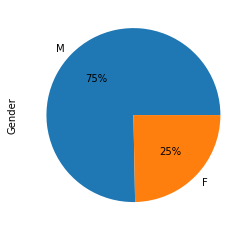

In [11]:
df.Gender.value_counts().plot(kind='pie',autopct='%.f%%')

* Above graph shows that Male prefer to shop more than female.

<AxesSubplot:xlabel='Gender,Marital_Status'>

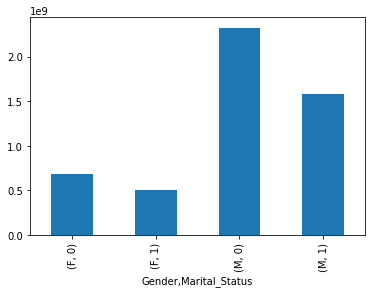

In [12]:
df.groupby(['Gender','Marital_Status'])['Purchase'].sum().plot(kind='bar')


* Above graph shows that Unmarried(0) Male and Female tend to shop more than Married Male & Females.

<AxesSubplot:>

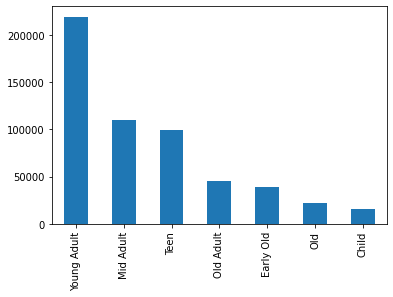

In [13]:
df.Age.value_counts().plot(kind='bar')

* Young adults prefer to shop more than other age group.

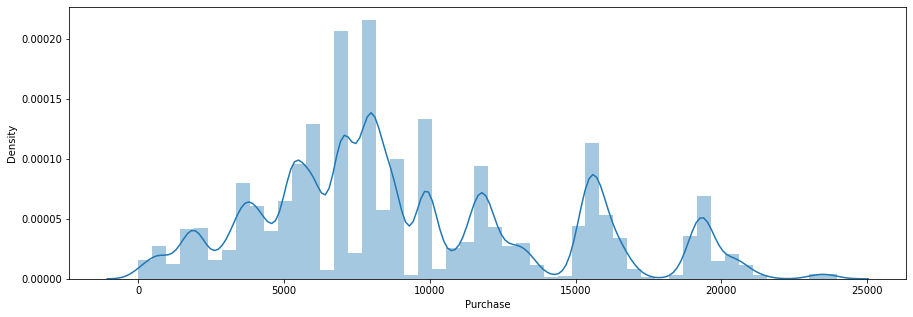

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(df['Purchase'])
plt.show()

* Above graph shows that maximum Purchase is in between 5000-10000.

<AxesSubplot:xlabel='Stay_In_City', ylabel='count'>

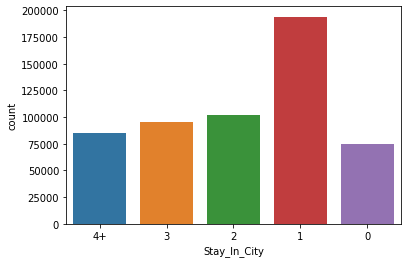

In [15]:

sns.countplot(x='Stay_In_City', data=df)
#df.Stay_In_City.value_counts().plot(kind='pie',autopct='%.f%%')

* Above graph shows that most of the customer stays in the city for 1 year.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

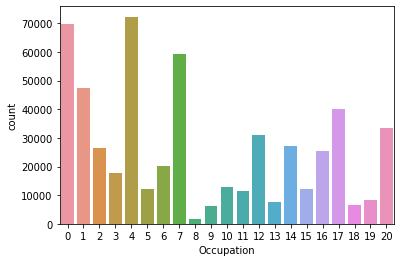

In [16]:
sns.countplot(x='Occupation', data=df)

* Above graph shows that occupation 0, 4 & 7 has maximum shopping tendency.

<AxesSubplot:ylabel='City_Category'>

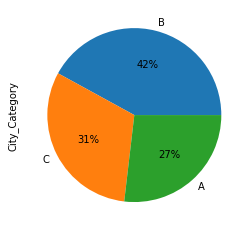

In [17]:
df.City_Category.value_counts().plot(kind='pie',autopct='%.f%%')
#df.City_Category.value_counts().plot(kind='bar')

* Above graph shows that majority customers are from city B.

<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

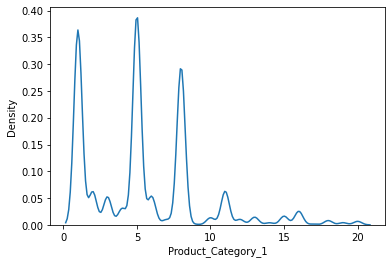

In [18]:
sns.kdeplot(df['Product_Category_1'])


* Above graph shows that Product_Category_1 has highest selling products 1, 5 and 8 .

<AxesSubplot:xlabel='Age'>

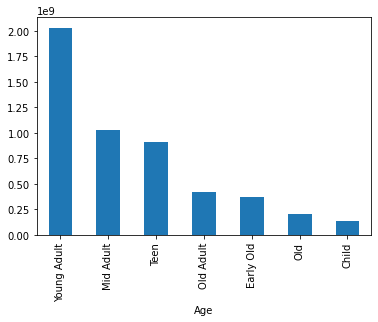

In [19]:
df.groupby('Age')['Purchase'].sum().nlargest(10).plot(kind='bar')

* Above graph shows that Young Adult spends maximum money on shopping(2*10^9), whereas Child & Early Old people spend lowest.

<AxesSubplot:xlabel='Occupation'>

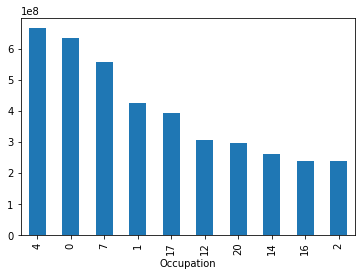

In [20]:
df.groupby('Occupation')['Purchase'].sum().nlargest(10).plot(kind='bar')


* Above graph shows that people with occupation 4 & 0 has maximum purchasing power(6.5*10^8).

<AxesSubplot:xlabel='Product_Category_1'>

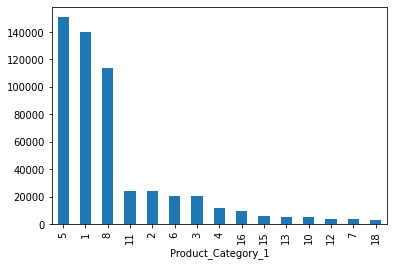

In [21]:
df.groupby('Product_Category_1')['Purchase'].count().nlargest(15).plot(kind='bar')


* Above graph shows that 'Product 5' from 'Product_Category_1' has maximum sell(140000).

In [22]:
c=df.groupby('Product_Category_1')['Purchase'].mean()#.nlargest(15).plot(kind='bar')
c

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

In [23]:
# a=df.groupby('Product_Category_1')['Purchase'].count()  #Product1= 140378
# b=df.groupby('Product_Category_1')['Purchase'].sum()    #Product1= 1910013754
# c=b/a
# c
# We can calculate the price of each product from above information: (1910013754/140378)=13,606.21


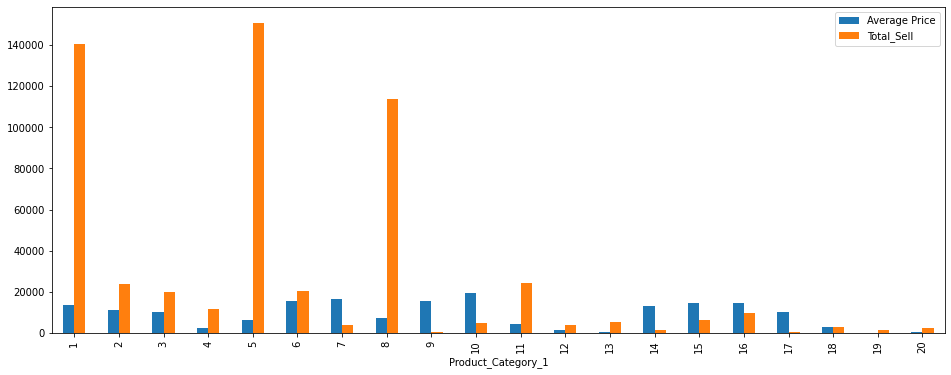

In [24]:
d=df.groupby('Product_Category_1')['Purchase'].count()
s=pd.DataFrame((c,d)).T.plot(kind='bar',figsize=(16,6))
s.legend(["Average Price", "Total_Sell"]);


* Above graph shows Product sell(Orange) & Price of the product(Blue). 

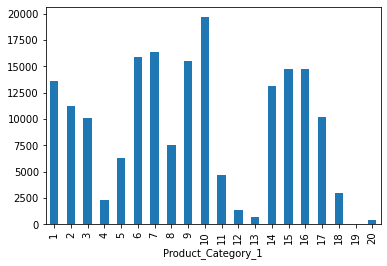

In [25]:
new2=c.plot(kind='bar')


* Above graph shows the price of each product from 'Product Category 1'

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

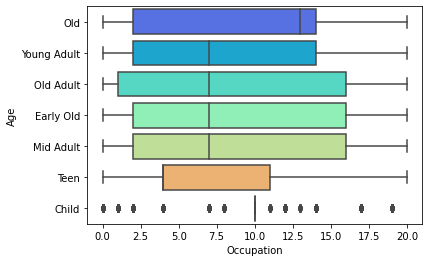

In [26]:
sns.boxplot(y="Age", x="Occupation", data=df, palette='rainbow')

* Above graph shows the occupation of each age group.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

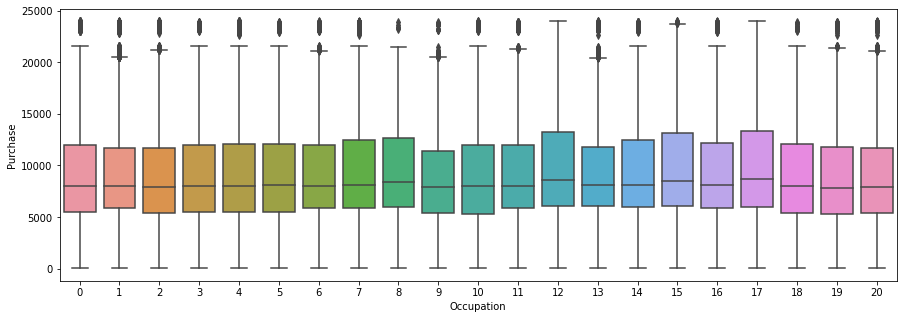

In [27]:
plt.figure(figsize = (15,5))
sns.boxplot(x = df['Occupation'] , y = df['Purchase'])